In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Load dataset
file_path = 'final_data.csv'  
data = pd.read_csv(file_path)

# Drop rows where 'Voter Turnout %' is missing
data_cleaned = data.dropna(subset=['Voter Turnout %'])

# Impute missing values in numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if col != 'Voter Turnout %':
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)



In [4]:
# Preparing the features and target variable
features_cleaned = data_cleaned.drop(['Year', 'State', 'State Abbr', 'State FIPS', 'District', 'Voter Turnout %'], axis=1)
target_cleaned = data_cleaned['Voter Turnout %']

# Scaling the features
scaler = StandardScaler()
features_scaled_cleaned = scaler.fit_transform(features_cleaned)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_cleaned, target_cleaned, test_size=0.2, random_state=42)

# Defining the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 4, 6, 8]
}



In [5]:
# Setting up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Performing the randomized search
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Outputting the results
print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 3, 'learning_rate': 0.105}
Best Score: 0.562753578394827


In [6]:
# Predicting on the test set with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 75.82491144450587
R-squared Score: 0.579422961973772


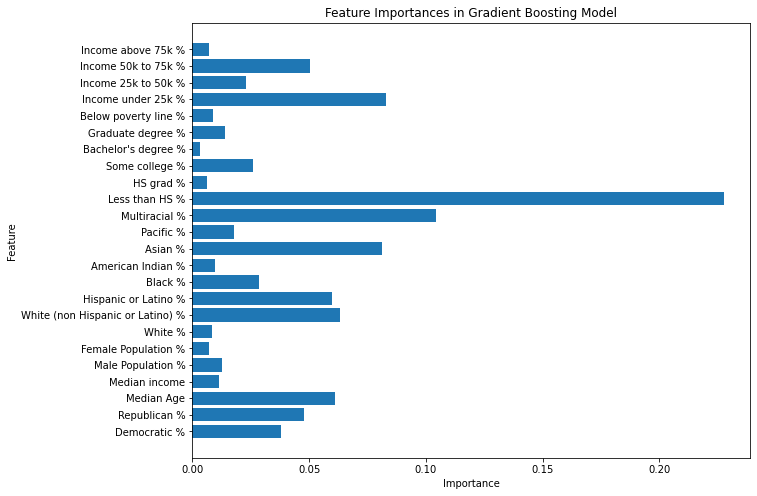

In [7]:
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = best_model.feature_importances_

# Creating a bar chart for feature importances
features = list(features_cleaned.columns)
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Model')
plt.show()